In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# pip install wget

In [3]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

In [4]:
# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


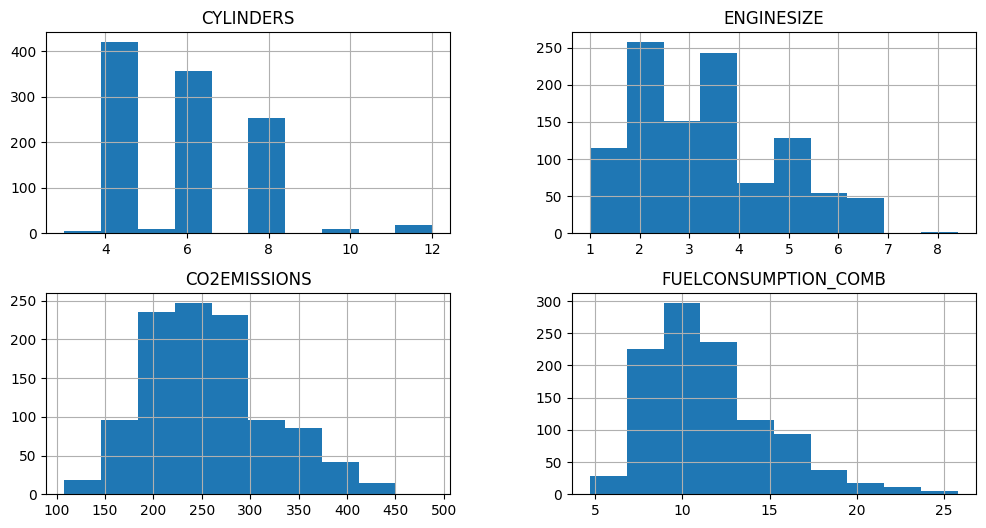

In [9]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

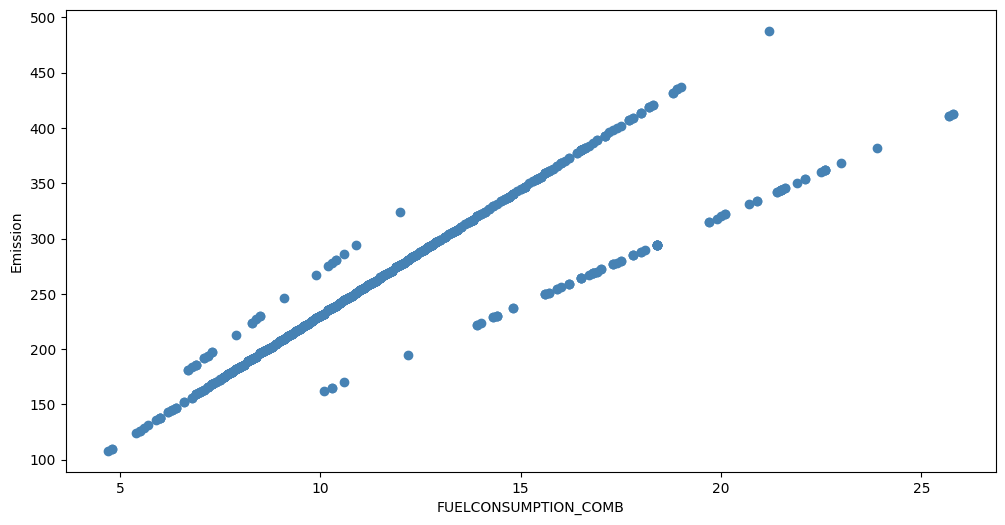

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

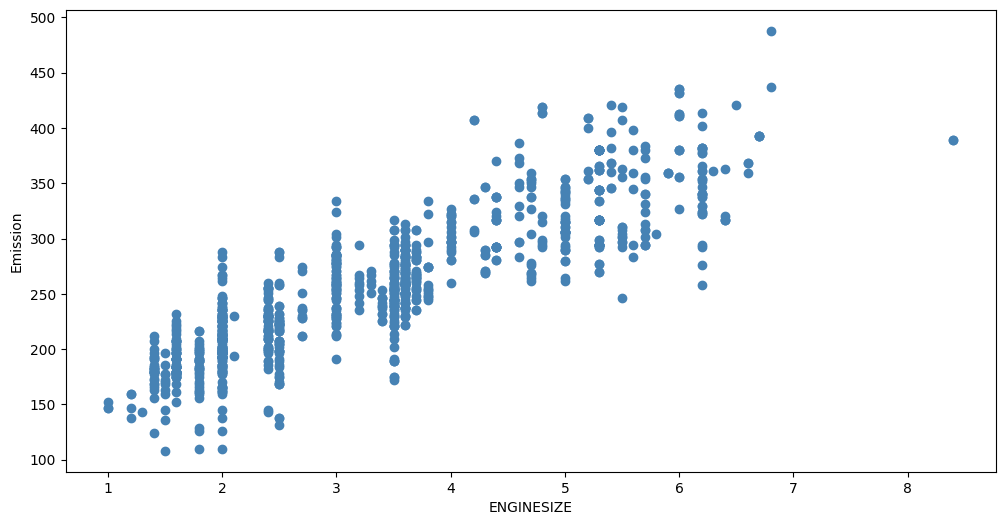

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

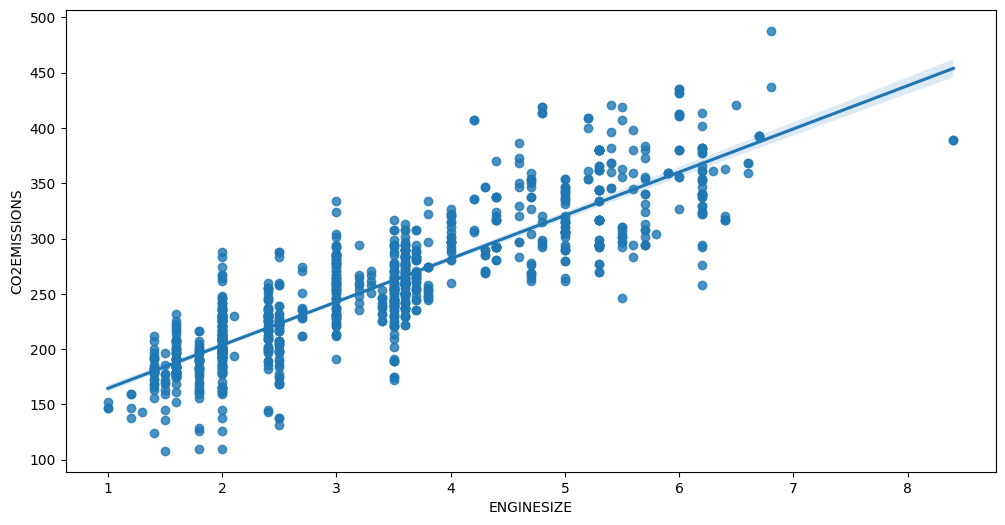

In [12]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

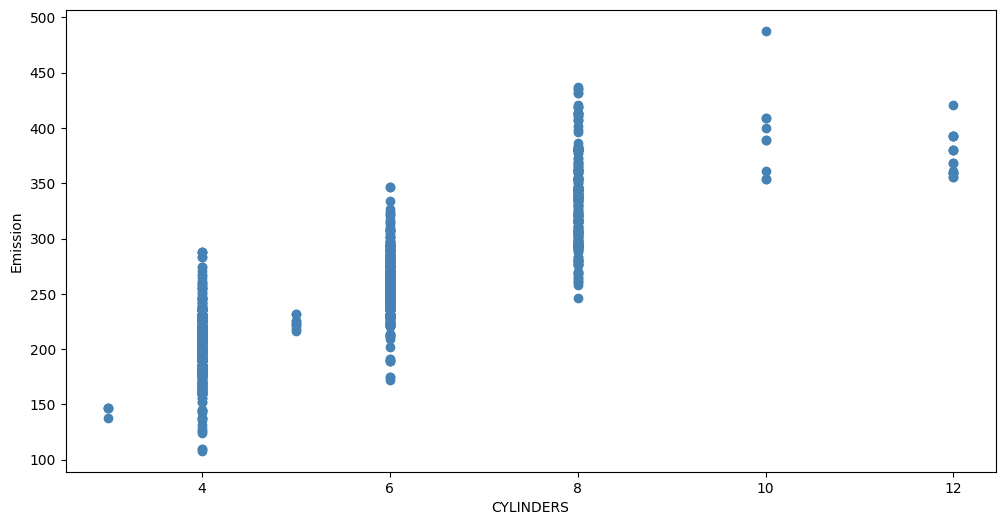

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [14]:
msk = np.random.rand(len(df)) < 0.8 # 80% of data for training
# array([False,  True,  True, ..., False, False,  True])
train = cdf[msk]
test = cdf[~msk]

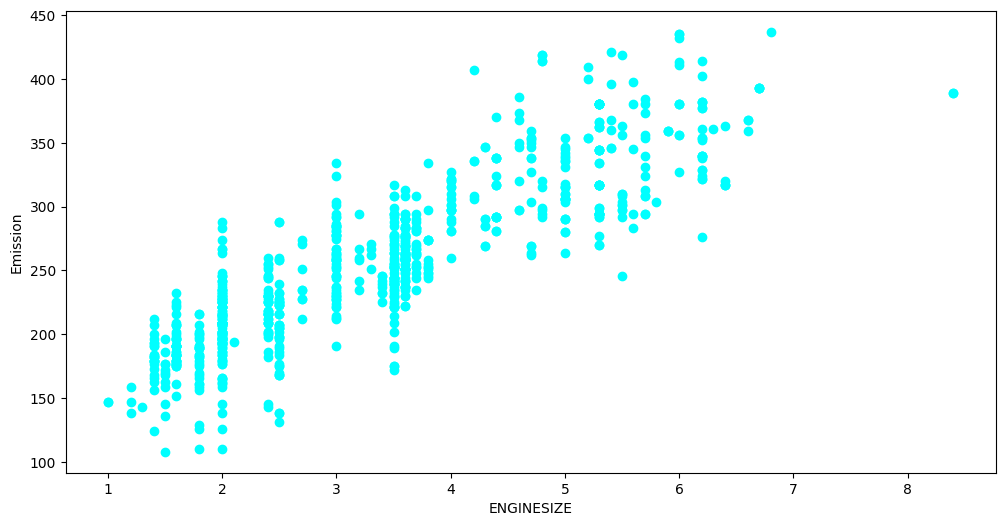

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='cyan')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

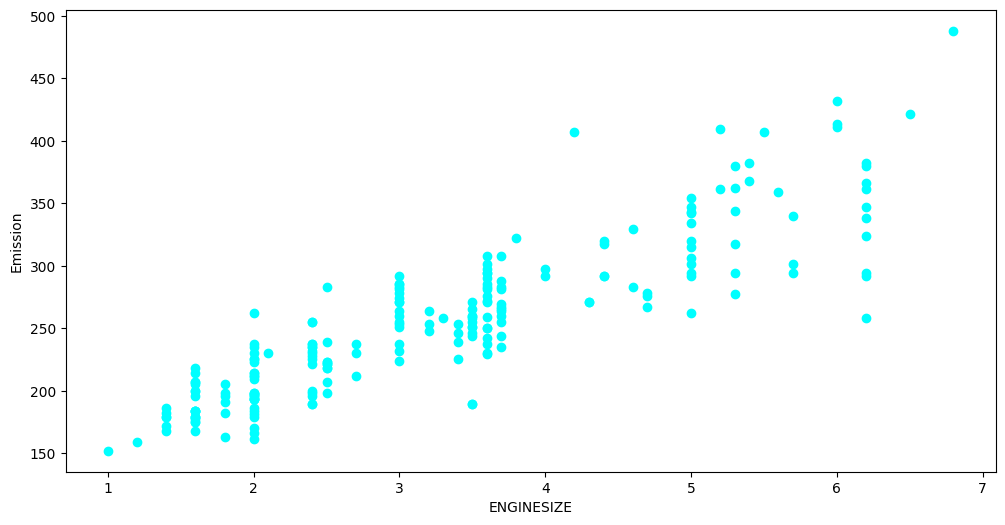

In [16]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='cyan')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # instance of linear regression
train_x = np.asanyarray(train[['ENGINESIZE']]) # convert to numpy array
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# DataFrame'in değerlerini Numpy Array'e çevirmek için values kullanılır.
# train_x = train[['ENGINESIZE']].values
# train_y = train[['CO2EMISSIONS']].values
print(type(train_x))
print(type(train_y))
regr.fit(train_x, train_y) # fit the data

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LinearRegression()

In [18]:
print(regr.coef_) # slope
print(regr.intercept_) # intercept
# y = mx + b
# y = regr.coef_ * x + intercept_

[[39.13301094]]
[124.86597691]


# Model evaluation metrics:
- Mean Absolute Error
- Mean Squeared Error (MSE)
- Root Mean Squared Error (RMSE)

In [19]:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE']].values
test_y = test[['CO2EMISSIONS']].values
test_y_ = regr.predict(test_x)

In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.84
Residual sum of squares (MSE): 863.08
R2-score: 0.71


In [21]:
# TODO
# calculate values for FUELCONSUMPTION_COMB
# Use scikit-learn to implement Multiple Linear Regression
# Create a model, train it, using train dataset

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = train[['FUELCONSUMPTION_COMB']].values
train_y = train[['CO2EMISSIONS']].values

test_x = test[['FUELCONSUMPTION_COMB']].values
test_y = test[['CO2EMISSIONS']].values

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.84
Residual sum of squares (MSE): 863.08
R2-score: 0.71
